In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from preprocess import load_data, load_clean_data, data_stats, create_features, create_features_labels
from plots import plot_validation_diagram, plot_samples, plot_avg, plot_ewma, detect_raw_signal
from IPython.display import display
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/home/buzz/anaconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
np.set_printoptions(precision=2)

### Load model

In [3]:
top_model_path = 'weights/top_model_navlr.h5'
classes = ['A', 'L', 'N', 'NB', 'R', 'V']
tm = load_model(top_model_path)

### Experiment with raw signal

In [3]:
ecg = pd.read_csv('dataset/ecg_20180103_140740.csv')

In [14]:
ecg.describe()

,id,delay,ecg
count,12965.000000,12965.000000,12965.000000
mean,6483.000000,3013.036020,520.802777
std,3742.817455,38.927832,88.705078
min,1.000000,2875.000000,190.000000
25%,3242.000000,3001.000000,477.000000
50%,6483.000000,3019.000000,495.000000
75%,9724.000000,3034.000000,544.000000
max,12965.000000,3966.000000,984.000000


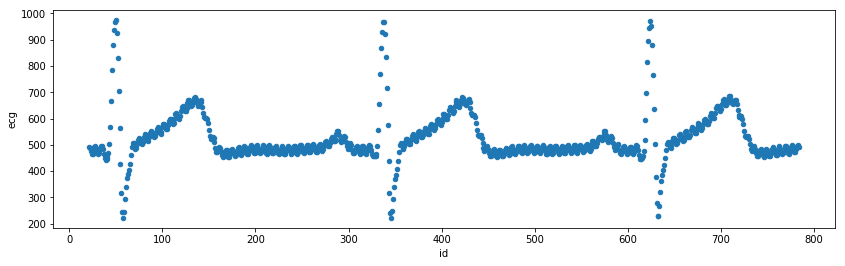

In [4]:
ecg[20:784].plot.scatter(x='id', y='ecg', figsize=(14,4));

In [5]:
class EcgCleaner:
    def __init__(self, alpha):
        self.avgEcg = 0.
        self.alpha = alpha
        
    def update(self, sample):
        self.avgEcg = self.avgEcg * (1 - self.alpha) + sample['ecg'] / 1023. * self.alpha
        return self.avgEcg

In [6]:
def detect(alpha = 1., start = 0, end = 1000, scale = True):
    cleaner = EcgCleaner(alpha)
    for i, val in ecg.iterrows():
        ecg.at[i, 'S'] = cleaner.update(val)
    detect_raw_signal(tm, classes, ecg, start, end)

Frame: 622 Type: N Pred: 1.00 Preds: [  3.97e-09   1.83e-16   9.99e-01   1.23e-03   1.32e-18   9.59e-18]
Frame: 910 Type: N Pred: 0.98 Preds: [  2.26e-04   1.19e-10   9.80e-01   2.00e-02   2.79e-11   1.79e-09]
Frame: 1482 Type: N Pred: 0.95 Preds: [  1.30e-08   5.46e-13   9.50e-01   5.01e-02   1.28e-11   1.08e-14]
Frame: 1776 Type: N Pred: 1.00 Preds: [  5.20e-06   4.10e-15   9.98e-01   2.17e-03   4.48e-14   3.42e-14]
Frame: 2694 Type: N Pred: 1.00 Preds: [  4.00e-08   1.20e-13   9.96e-01   3.74e-03   2.62e-16   2.60e-15]
Frame: 2994 Type: N Pred: 1.00 Preds: [  8.83e-08   2.76e-12   9.95e-01   4.59e-03   1.46e-12   2.64e-14]
Frame: 3284 Type: N Pred: 0.99 Preds: [  1.38e-04   6.39e-09   9.92e-01   7.93e-03   6.95e-11   6.00e-11]
Frame: 3580 Type: N Pred: 1.00 Preds: [  5.61e-09   2.15e-16   9.99e-01   1.14e-03   1.82e-15   3.73e-16]
Frame: 3866 Type: N Pred: 0.98 Preds: [  1.04e-04   3.51e-12   9.83e-01   1.70e-02   1.80e-09   2.82e-12]
Frame: 4132 Type: N Pred: 0.93 Preds: [  3.67e-0

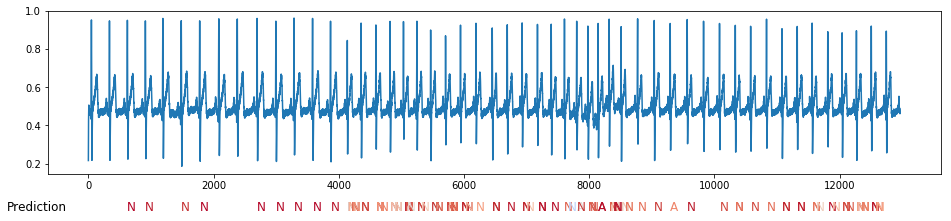

In [7]:
detect(alpha=1., start = 0, end = 12965, scale = False)

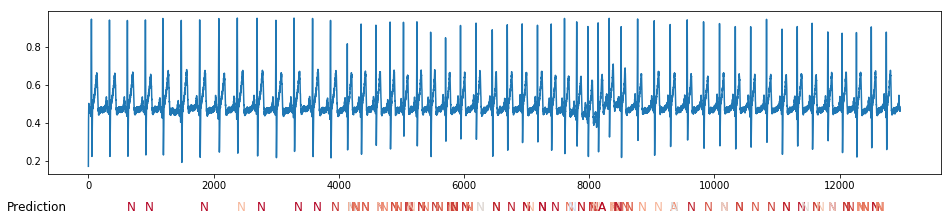

In [34]:
detect(alpha=.8, start = 0, end = 12965, scale = False)

/home/buzz/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


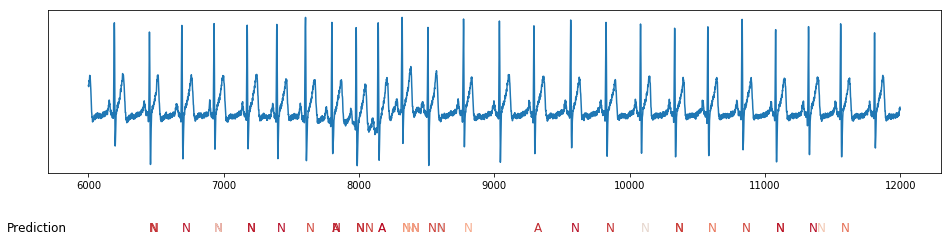

In [106]:
detect(.7, 6000, 12000) # smoothing .4

/home/buzz/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


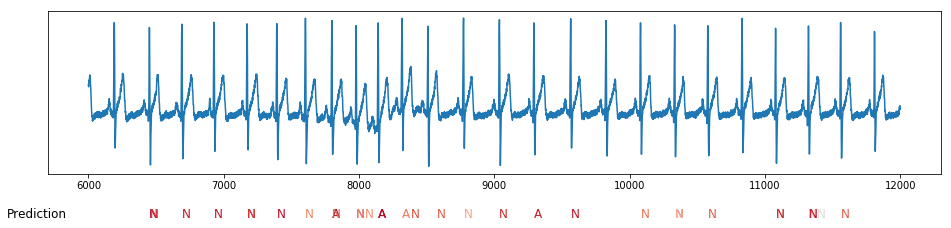

In [105]:
detect(1., 6000, 12000) # no smoothing